In [78]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [115]:
#rdir = '/workspace'
rdir = '../../..'
dat_files = natsort(glob2.glob(rdir + '/temp_results/results/B/**/*.dat'))


In [130]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'ndp.subzone', 'realtime' ]


data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False).dropna()
    data.append(df.max())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns

/Users/dansandiford/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [131]:
#newdf

eta_min_crust = []
eta_max_crust= []
eta_min_interface=[]
eta_max_interface=[]
cc=[]
ci=[]
fcc=[]
fci=[]
for a in [0.01, 0.1, 1.0]:
    for b in [1.0, 10.0, 100.0, 1000.]:
        for c in [1.0, 0.1, 0.01]:
            for d in [1.0, 0.1, 0.01]:
                eta_min_crust.append(a) 
                eta_min_interface.append(a) 
                eta_max_crust.append(b)
                eta_max_interface.append(b)
                cc.append(c)
                ci.append(c)
                fcc.append(d)
                fci.append(d)

newdf['eta_min_crust'] = eta_min_crust
newdf['eta_max_crust'] = eta_max_crust
newdf['eta_min_interface'] = eta_min_interface
newdf['eta_max_interface'] = eta_max_interface
newdf['cc'] = cc
newdf['ci'] = ci
newdf['fcc'] = fcc
newdf['fci'] = fci

In [132]:
eta_min_crust=[] 
eta_max_crust=[] 
eta_min_interface=[]
eta_max_interface=[]
MANTLETOCRUST=[] 
eta0=[]
RES=[]

for a in [0.1, 0.5, 1.0, 2.0, 10.]:
    for b in [0.8, 1.2, 1.6]:
        for c in [0.5, 1.0, 2.0]:
            for d in [128, 192]:
                eta_min_crust.append(a)
                eta_max_crust.append(a) 
                eta_min_interface.append(a)
                eta_max_interface.append(a)
                MANTLETOCRUST.append(b)
                eta0.append(c)
                RES.append(d)


In [133]:
newdf['eta_min_crust'] = eta_min_crust
newdf['eta_max_crust'] = eta_max_crust
newdf['eta_min_interface'] = eta_min_interface
newdf['eta_max_interface'] = eta_max_interface #Constant viscosity crust an inteface
newdf['MANTLETOCRUST'] = MANTLETOCRUST
newdf['eta0'] = eta0
newdf['RES'] = RES

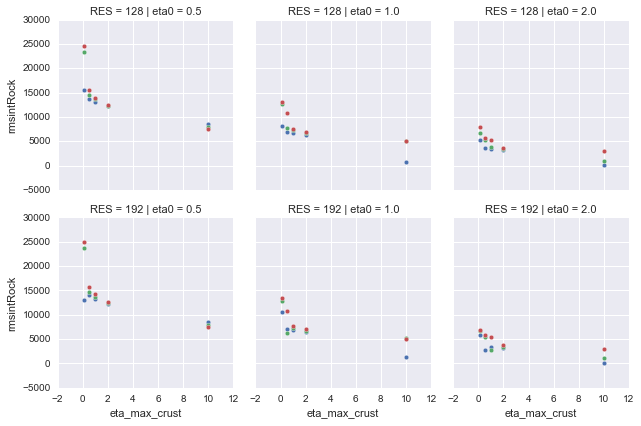

In [139]:
g = sns.FacetGrid(newdf, col="eta0",  row='RES', hue="MANTLETOCRUST")
g = g.map(plt.scatter, 'eta_max_crust', 'rmsintRock', edgecolor="w")

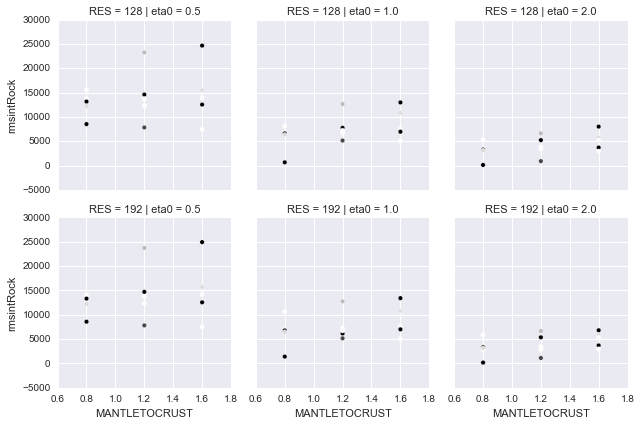

In [138]:
g = sns.FacetGrid(newdf, col="eta0",  row='RES', hue="eta_max_crust")
g = g.map(plt.scatter, 'MANTLETOCRUST',  'rmsintRock', edgecolor="w")